In [116]:
import pandas as pd
import numpy as np
import talib as ta

import seaborn as sns
import matplotlib.pyplot as plt

PATH_READ_STOCK = '301085_train_raw.csv'

PATH_WRITE = '123181_train_withF.csv'
# df = pd.read_csv(PATH_READ, index_col='Timestamp')
df = pd.read_csv(PATH_READ_STOCK)

In [117]:
def MACD_length(df, type, fastPeriod, slowPeriod, signalPeriod):
    column = df[type]
    
    # macd, signal, hist = ta.MACD(column, fastperiod=fastPeriod, slowperiod=slowPeriod, signalperiod=signalPeriod)

    # Trying Manual MACD
    short_ema = column.ewm(span=fastPeriod, adjust=False).mean()

    # Step 2: Calculate the long-term (slow) EMA
    long_ema = column.ewm(span=slowPeriod, adjust=False).mean()

    # Step 3: Calculate the MACD line
    macd_line = short_ema - long_ema

    # Step 4: Calculate the signal line (Trigger line)
    signal_line = macd_line.ewm(span=signalPeriod, adjust=False).mean()

    result = abs(macd_line - signal_line) * np.sign(macd_line)

    return result

In [118]:
def RSI (df, type, period):
    column = np.array(df[type])
    return ta.RSI(column, timeperiod = period)

In [119]:
def avgPrice(df):
    df['Avg'] = df['Turnover']/df['Volume']

    nan_rows_Avg = df[df['Avg'].isnull()]

    for index in nan_rows_Avg.index:
        if df.at[index, 'High'] == df.at[index, 'Low'] == df.at[index, 'Open'] == df.at[index, 'Close']:
            df.at[index, 'Avg'] = df.at[index, 'High']
            # print('Changed: ' + str(df.at[index, 'Avg']))

        elif df.at[index, 'Turnover'] == 0 or df.at[index, 'Volume'] == 0:
            df.at[index, 'Avg'] = (df.at[index, 'High'] + df.at[index, 'Low'] + df.at[index, 'Open'] + df.at[index, 'Close']) / 4

<Axes: >

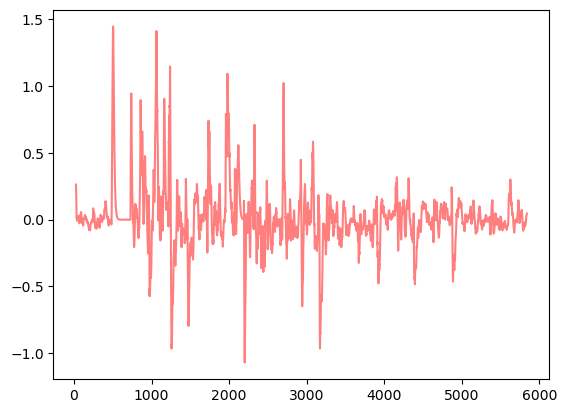

In [121]:
df = df.head(35000)

avgPrice(df)

df['Avg'].to_csv('temp_avg.csv')

df['RSI'] = RSI(df=df, type='Avg', period=12)

macd, signal, hist = ta.MACD(df['Avg'], fastperiod=12, slowperiod=20, signalperiod=9)

sns.lineplot(data=macd, color='r', alpha=0.5)
